In [1]:
import torch
import torch.nn
import torchvision
from torchvision import transforms
import numpy as np
from torch.utils.data.sampler import SubsetRandomSampler
from matplotlib import pyplot as plt
from torchvision.utils import make_grid
import pickle
import os
from matplotlib.lines import Line2D

In [ ]:
# Define the used device
# Check whether cuda or cpu is used
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# If GPU is used, write cuda. Otherwise, CPU will be used for training
print(device) 

In [ ]:
transform = transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
    torchvision.transforms.Grayscale()
])

# Training set
train_data = torchvision.datasets.CIFAR10("./data", train = True, download = True,
                                          transform = transform)

In [4]:
# Define dataloaders to that are sampled accordingly
batch_size = 50
train_generator = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle = True)

In [5]:
# First Class: Multi Layer Perceptron 1 Class 
# mlp1: [FC-32, ReLU] + PredictionLayer
class mlp1(torch.nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(mlp1, self).__init__()
    self.input_size = input_size
    self.fc1 = torch.nn.Linear(input_size, hidden_size)
    self.fc2 = torch.nn.Linear(hidden_size, num_classes, bias = False)
    self.relu = torch.nn.ReLU()
  def forward(self, x):
    x = x.view(-1, self.input_size)
    hidden = self.fc1(x)
    relu = self.relu(hidden)
    output = self.fc2(relu)
    return output

In [6]:
# First Class: Multi Layer Perceptron 1 Class 
# mlp1: [FC-32, ReLU] + PredictionLayer
class mlp1_sigmoid(torch.nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super(mlp1_sigmoid, self).__init__()
    self.input_size = input_size
    self.fc1 = torch.nn.Linear(input_size, hidden_size)
    self.fc2 = torch.nn.Linear(hidden_size, num_classes, bias = False)
    self.sigmoid = torch.nn.Sigmoid()
  def forward(self, x):
    x = x.view(-1, self.input_size)
    hidden = self.fc1(x)
    sigmoid = self.sigmoid(hidden)
    output = self.fc2(sigmoid)
    return output

In [7]:
# Second Class: Multi Layer Perceptron 2 Class
class mlp2(torch.nn.Module):
  def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
    super(mlp2, self).__init__()
    self.input_size = input_size
    self.fc1 = torch.nn.Linear(input_size, hidden_size1)
    self.fc2 = torch.nn.Linear(hidden_size1, hidden_size2, bias = False)
    self.fc3 = torch.nn.Linear(hidden_size2, num_classes, bias = False)
    self.relu = torch.nn.ReLU()
  def forward(self, x):
    x = x.view(-1, self.input_size)
    hidden1 = self.fc1(x)
    relu = self.relu(hidden1)
    hidden2 = self.fc2(relu)
    output = self.fc3(hidden2)
    return output

In [8]:
# Second Class: Multi Layer Perceptron 2 Class
class mlp2_sigmoid(torch.nn.Module):
  def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
    super(mlp2_sigmoid, self).__init__()
    self.input_size = input_size
    self.fc1 = torch.nn.Linear(input_size, hidden_size1)
    self.fc2 = torch.nn.Linear(hidden_size1, hidden_size2, bias = False)
    self.fc3 = torch.nn.Linear(hidden_size2, num_classes, bias = False)
    self.sigmoid = torch.nn.Sigmoid()
  def forward(self, x):
    x = x.view(-1, self.input_size)
    hidden1 = self.fc1(x)
    sigmoid = self.sigmoid(hidden1)
    hidden2 = self.fc2(sigmoid)
    output = self.fc3(hidden2)
    return output

In [9]:
# Third Class: Convolutional Neural Network 3
class cnn_3(torch.nn.Module):
  def __init__(self):
    super(cnn_3, self).__init__()
    self.conv1 = torch.nn.Conv2d(1, 16, kernel_size = (3,3), stride = 1, padding = 'valid')
    self.relu1 = torch.nn.ReLU()
    self.conv2 = torch.nn.Conv2d(16, 8, kernel_size = (5,5), stride = 1, padding = 'valid')
    self.relu2 = torch.nn.ReLU()
    self.maxpool1 = torch.nn.MaxPool2d(kernel_size = (2,2), stride = 2, padding = 0)
    self.conv3 = torch.nn.Conv2d(8, 16, kernel_size = (7,7), stride = 1, padding = 'valid')
    self.maxpool2 = torch.nn.MaxPool2d(kernel_size = (2,2), stride = 2, padding = 0)
    self.fc  = torch.nn.Linear(16*3*3, 10, bias = False)
    
  def forward(self, x):
    x = self.conv1(x)
    x = self.relu1(x)
    x = self.conv2(x)
    x = self.relu2(x)
    x = self.maxpool1(x)
    x = self.conv3(x)
    x = self.maxpool2(x)
    x = x.view(-1, 16*3*3)
    
    x = self.fc(x)
    return x

In [10]:
# Third Class: Convolutional Neural Network 3
class cnn_3_sigmoid(torch.nn.Module):
  def __init__(self):
    super(cnn_3_sigmoid, self).__init__()
    self.conv1 = torch.nn.Conv2d(1, 16, kernel_size = (3,3), stride = 1, padding = 'valid')
    self.sigmoid1 = torch.nn.Sigmoid()
    self.conv2 = torch.nn.Conv2d(16, 8, kernel_size = (5,5), stride = 1, padding = 'valid')
    self.sigmoid2 = torch.nn.Sigmoid()
    self.maxpool1 = torch.nn.MaxPool2d(kernel_size = (2,2), stride = 2, padding = 0)
    self.conv3 = torch.nn.Conv2d(8, 16, kernel_size = (7,7), stride = 1, padding = 'valid')
    self.maxpool2 = torch.nn.MaxPool2d(kernel_size = (2,2), stride = 2, padding = 0)
    self.fc  = torch.nn.Linear(16*3*3, 10, bias = False)
    
  def forward(self, x):
    x = self.conv1(x)
    x = self.sigmoid1(x)
    x = self.conv2(x)
    x = self.sigmoid2(x)
    x = self.maxpool1(x)
    x = self.conv3(x)
    x = self.maxpool2(x)
    x = x.view(-1, 16*3*3)
    
    x = self.fc(x)
    return x

In [11]:
# Fourth Class: Convolutional Neural Network 4
class cnn_4(torch.nn.Module):
  def __init__(self):
    super(cnn_4, self).__init__()
    self.conv1 = torch.nn.Conv2d(1, 16, kernel_size = (3,3), stride = 1, padding = 'valid')
    self.relu1 = torch.nn.ReLU()
    self.conv2 = torch.nn.Conv2d(16, 8, kernel_size = (3,3), stride = 1, padding = 'valid')
    self.relu2 = torch.nn.ReLU()
    self.conv3 = torch.nn.Conv2d(8, 16, kernel_size = (5,5), stride = 1, padding = 'valid')
    self.relu3 = torch.nn.ReLU()
    self.maxpool1 = torch.nn.MaxPool2d(kernel_size = (2,2), stride = 2, padding = 0)
    self.conv4 = torch.nn.Conv2d(16, 16, kernel_size = (5,5), stride = 1, padding = 'valid')
    self.relu4 = torch.nn.ReLU()
    self.maxpool2 = torch.nn.MaxPool2d(kernel_size = (2,2), stride = 2, padding = 0)
    self.fc = torch.nn.Linear(16*4*4, 10, bias = False)
    
  def forward(self, x):
    x = self.conv1(x)
    x = self.relu1(x)
    x = self.conv2(x)
    x = self.relu2(x)
    x = self.conv3(x)
    x = self.relu3(x)
    x = self.maxpool1(x)
    x = self.conv4(x)
    x = self.relu4(x)
    x = self.maxpool2(x)
    x = x.view(-1, 16*4*4)
    x = self.fc(x)
    return x

In [12]:
# Fourth Class: Convolutional Neural Network 4
class cnn_4_sigmoid(torch.nn.Module):
  def __init__(self):
    super(cnn_4_sigmoid, self).__init__()
    self.conv1 = torch.nn.Conv2d(1, 16, kernel_size = (3,3), stride = 1, padding = 'valid')
    self.sigmoid1 = torch.nn.Sigmoid()
    self.conv2 = torch.nn.Conv2d(16, 8, kernel_size = (3,3), stride = 1, padding = 'valid')
    self.sigmoid2 = torch.nn.Sigmoid()
    self.conv3 = torch.nn.Conv2d(8, 16, kernel_size = (5,5), stride = 1, padding = 'valid')
    self.sigmoid3 = torch.nn.Sigmoid()
    self.maxpool1 = torch.nn.MaxPool2d(kernel_size = (2,2), stride = 2, padding = 0)
    self.conv4 = torch.nn.Conv2d(16, 16, kernel_size = (5,5), stride = 1, padding = 'valid')
    self.sigmoid4 = torch.nn.Sigmoid()
    self.maxpool2 = torch.nn.MaxPool2d(kernel_size = (2,2), stride = 2, padding = 0)
    self.fc = torch.nn.Linear(16*4*4, 10, bias = False)
    
  def forward(self, x):
    x = self.conv1(x)
    x = self.sigmoid1(x)
    x = self.conv2(x)
    x = self.sigmoid2(x)
    x = self.conv3(x)
    x = self.sigmoid3(x)
    x = self.maxpool1(x)
    x = self.conv4(x)
    x = self.sigmoid4(x)
    x = self.maxpool2(x)
    x = x.view(-1, 16*4*4)
    x = self.fc(x)
    return x

In [13]:
# Fifth Class: Convolutional Neural Network 5
class cnn_5(torch.nn.Module):
  def __init__(self):
    super(cnn_5, self).__init__()
    self.conv1 = torch.nn.Conv2d(1, 8, kernel_size = (3,3), stride = 1, padding = 'valid')
    self.relu1 = torch.nn.ReLU()
    self.conv2 = torch.nn.Conv2d(8, 16, kernel_size = (3,3), stride = 1, padding = 'valid')
    self.relu2 = torch.nn.ReLU()
    self.conv3 = torch.nn.Conv2d(16, 8, kernel_size = (3,3), stride = 1, padding = 'valid')
    self.relu3 = torch.nn.ReLU()
    self.conv4 = torch.nn.Conv2d(8, 16, kernel_size = (3,3), stride = 1, padding = 'valid')
    self.relu4 = torch.nn.ReLU()
    self.maxpool1 = torch.nn.MaxPool2d(kernel_size = (2,2), stride = 2, padding = 0)
    self.conv5 = torch.nn.Conv2d(16, 16, kernel_size = (3,3), stride = 1, padding = 'valid')
    self.relu5 = torch.nn.ReLU()
    self.conv6 = torch.nn.Conv2d(16, 8, kernel_size = (3,3), stride = 1, padding = 'valid')
    self.relu6 = torch.nn.ReLU()
    self.maxpool2 = torch.nn.MaxPool2d(kernel_size = (2,2), stride = 2, padding = 0)
    self.fc = torch.nn.Linear(16*4*4, 10, bias = False)
  
  def forward(self, x):
    x = self.conv1(x)
    x = self.relu1(x)
    x = self.conv2(x)
    x = self.relu2(x)
    x = self.conv3(x)
    x = self.relu3(x)
    x = self.maxpool1(x)
    x = self.conv4(x)
    x = self.relu4(x)
    x = self.conv5(x)
    x = self.relu5(x)
    x = self.maxpool2(x)
    x = x.view(-1, 16*4*4)
    x = self.fc(x)
    return x

In [14]:
# Fifth Class: Convolutional Neural Network 5
class cnn_5_sigmoid(torch.nn.Module):
  def __init__(self):
    super(cnn_5_sigmoid, self).__init__()
    self.conv1 = torch.nn.Conv2d(1, 8, kernel_size = (3,3), stride = 1, padding = 'valid')
    self.sigmoid1 = torch.nn.Sigmoid()
    self.conv2 = torch.nn.Conv2d(8, 16, kernel_size = (3,3), stride = 1, padding = 'valid')
    self.sigmoid2 = torch.nn.Sigmoid()
    self.conv3 = torch.nn.Conv2d(16, 8, kernel_size = (3,3), stride = 1, padding = 'valid')
    self.sigmoid3 = torch.nn.Sigmoid()
    self.conv4 = torch.nn.Conv2d(8, 16, kernel_size = (3,3), stride = 1, padding = 'valid')
    self.sigmoid4 = torch.nn.Sigmoid()
    self.maxpool1 = torch.nn.MaxPool2d(kernel_size = (2,2), stride = 2, padding = 0)
    self.conv5 = torch.nn.Conv2d(16, 16, kernel_size = (3,3), stride = 1, padding = 'valid')
    self.sigmoid5 = torch.nn.Sigmoid()
    self.conv6 = torch.nn.Conv2d(16, 8, kernel_size = (3,3), stride = 1, padding = 'valid')
    self.sigmoid6 = torch.nn.Sigmoid()
    self.maxpool2 = torch.nn.MaxPool2d(kernel_size = (2,2), stride = 2, padding = 0)
    self.fc = torch.nn.Linear(16*4*4, 10, bias = False)
  
  def forward(self, x):
    x = self.conv1(x)
    x = self.sigmoid1(x)
    x = self.conv2(x)
    x = self.sigmoid2(x)
    x = self.conv3(x)
    x = self.sigmoid3(x)
    x = self.maxpool1(x)
    x = self.conv4(x)
    x = self.sigmoid4(x)
    x = self.conv5(x)
    x = self.sigmoid5(x)
    x = self.maxpool2(x)
    x = x.view(-1, 16*4*4)
    x = self.fc(x)
    return x

In [ ]:
# Change the name of the model as required
model = cnn_5()
model.to(device)

In [ ]:
# Change the name of the model as required
model_sigmoid = cnn_5_sigmoid()
model_sigmoid.to(device)

In [155]:
# Compare ReLU and Logistic Sigmoid Function
# Use SGD for training method
# Learning Rate: 0.01
# Momentum: 0.0 (no momentum)
# Batch Size: 50
# No weight regularization

In [ ]:
# Traing the model
# Define the epoch number
epoch = 15

# Create train, validation and test accuracy lists that hold the accuracy values
train_loss = []
gradient_loss_magnitudes = []

# Calculate the total number of batches from division of train set and batch size 
batch_number = int(len(train_generator.dataset)/batch_size)

# Create loss: use cross entropy loss
loss_func = torch.nn.CrossEntropyLoss()

# Create the Adam optimizer with default parametersBaseException
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum = 0.0)

# For loop that iterates for each epoch
for cur_epoch in range(epoch):
  # Transfer the model to train mode
  model.train()
  for batch_idx, (x_train, y_train) in enumerate(train_generator):
    # Transfer the input and the output to the used device (cpu or cuda)
    x_train, y_train = x_train.to(device), y_train.to(device)

    # At every iteration reset the gradient to zero so that start from scratch
    optimizer.zero_grad()

    # Make prediction by using the model
    y_prediction = model(x_train)
    
    # Calculate the loss  
    loss = loss_func(y_prediction, y_train)
    
    # Backward pass and optimization step
    loss.backward()
    
    if (batch_idx + 1) % 10 == 0:
      # Save training loss and Loss Gradient for every 10 steps
      train_loss.append(loss.item())
      
      # Magnitudes of the Loss Gradients of the First Layer
      # Change XXX part according to the first layer of the architecture: model.XXX.weight.grad.nump()
      loss_gradient_first_layer = model.conv1.weight.grad.norm().item()
      gradient_loss_magnitudes.append(loss_gradient_first_layer)
      
      # Save the weights corresponding to the first layer
      first_layer_weights = model.conv1.weight.data.cpu().numpy()
      

      print('Epoch [{}/{}], Step [{}/{}], Train Loss = {:.2f}%, Loss Gradient = {:.2f}%'
                    .format(cur_epoch+1, epoch, batch_idx + 1, len(train_generator), loss.item(), 
                            loss_gradient_first_layer))
    optimizer.step()

In [ ]:
# Traing the model
# Define the epoch number
epoch = 15

# Create train, validation and test accuracy lists that hold the accuracy values
train_loss_sigmoid = []
gradient_loss_magnitudes_sigmoid = []

# Calculate the total number of batches from division of train set and batch size 
batch_number = int(len(train_generator.dataset)/batch_size)

# Create loss: use cross entropy loss
loss_func = torch.nn.CrossEntropyLoss()

# Create the Adam optimizer with default parametersBaseException
optimizer = torch.optim.SGD(model_sigmoid.parameters(), lr = 0.01, momentum = 0.0)

# For loop that iterates for each epoch
for cur_epoch in range(epoch):
  # Transfer the model to train mode
  model_sigmoid.train()
  for batch_idx, (x_train, y_train) in enumerate(train_generator):
    # Transfer the input and the output to the used device (cpu or cuda)
    x_train, y_train = x_train.to(device), y_train.to(device)

    # At every iteration reset the gradient to zero so that start from scratch
    optimizer.zero_grad()

    # Make prediction by using the model
    y_prediction = model_sigmoid(x_train)
    
    # Calculate the loss  
    loss = loss_func(y_prediction, y_train)
    
    # Backward pass and optimization step
    loss.backward()
    
    if (batch_idx + 1) % 10 == 0:
      # Save training loss and Loss Gradient for every 10 steps
      train_loss_sigmoid.append(loss.item())
      
      # Magnitudes of the Loss Gradients of the First Layer
      # Change XXX part according to the first layer of the architecture: model_sigmoid.XXX.weight.grad.nump()
      loss_gradient_first_layer_sigmoid = model_sigmoid.conv1.weight.grad.norm().item()
      gradient_loss_magnitudes_sigmoid.append(loss_gradient_first_layer_sigmoid)
      
      # Save the weights corresponding to the first layer
      first_layer_weights = model_sigmoid.conv1.weight.data.cpu().numpy()
      

      print('Epoch [{}/{}], Step [{}/{}], Train Loss = {:.2f}%, Loss Gradient = {:.2f}%'
                    .format(cur_epoch+1, epoch, batch_idx + 1, len(train_generator), loss.item(), 
                            loss_gradient_first_layer_sigmoid))
    optimizer.step()

In [158]:
train_result_dict = {
    'name': 'cnn_5',
    'relu_loss_curve': train_loss,
    'sigmoid_loss_curve': train_loss_sigmoid,
    'relu_grad_curve': gradient_loss_magnitudes,
    'sigmoid_grad_curve': gradient_loss_magnitudes_sigmoid 
}

# Save the dictionary object to a file
filename = 'part4_cnn_5.pkl'
with open(filename, 'wb') as f:
    pickle.dump(train_result_dict, f)

# To continue, add part4Plots function

In [ ]:
results = [train_result_dict]

part4Plots(results, save_dir=r'C:/Users/Yasin', filename='part4Plots')

# To create the representations of all models, upload their pickle files

In [7]:
# open a file, where you stored the pickled data
file1 = open('part4_mlp1.pkl', 'rb')

# dump information to that file
data1 = pickle.load(file1)

# close the file
file1.close()

# open a file, where you stored the pickled data
file2 = open('part4_mlp2.pkl', 'rb')

# dump information to that file
data2 = pickle.load(file2)

# close the file
file2.close()

# open a file, where you stored the pickled data
file3 = open('part4_cnn_3.pkl', 'rb')

# dump information to that file
data3 = pickle.load(file3)

# close the file
file3.close()

# open a file, where you stored the pickled data
file4 = open('part4_cnn_4.pkl', 'rb')

# dump information to that file
data4 = pickle.load(file4)

# close the file
file4.close()

# open a file, where you stored the pickled data
file5 = open('part4_cnn_5.pkl', 'rb')

# dump information to that file
data5 = pickle.load(file5)

# close the file
file5.close()

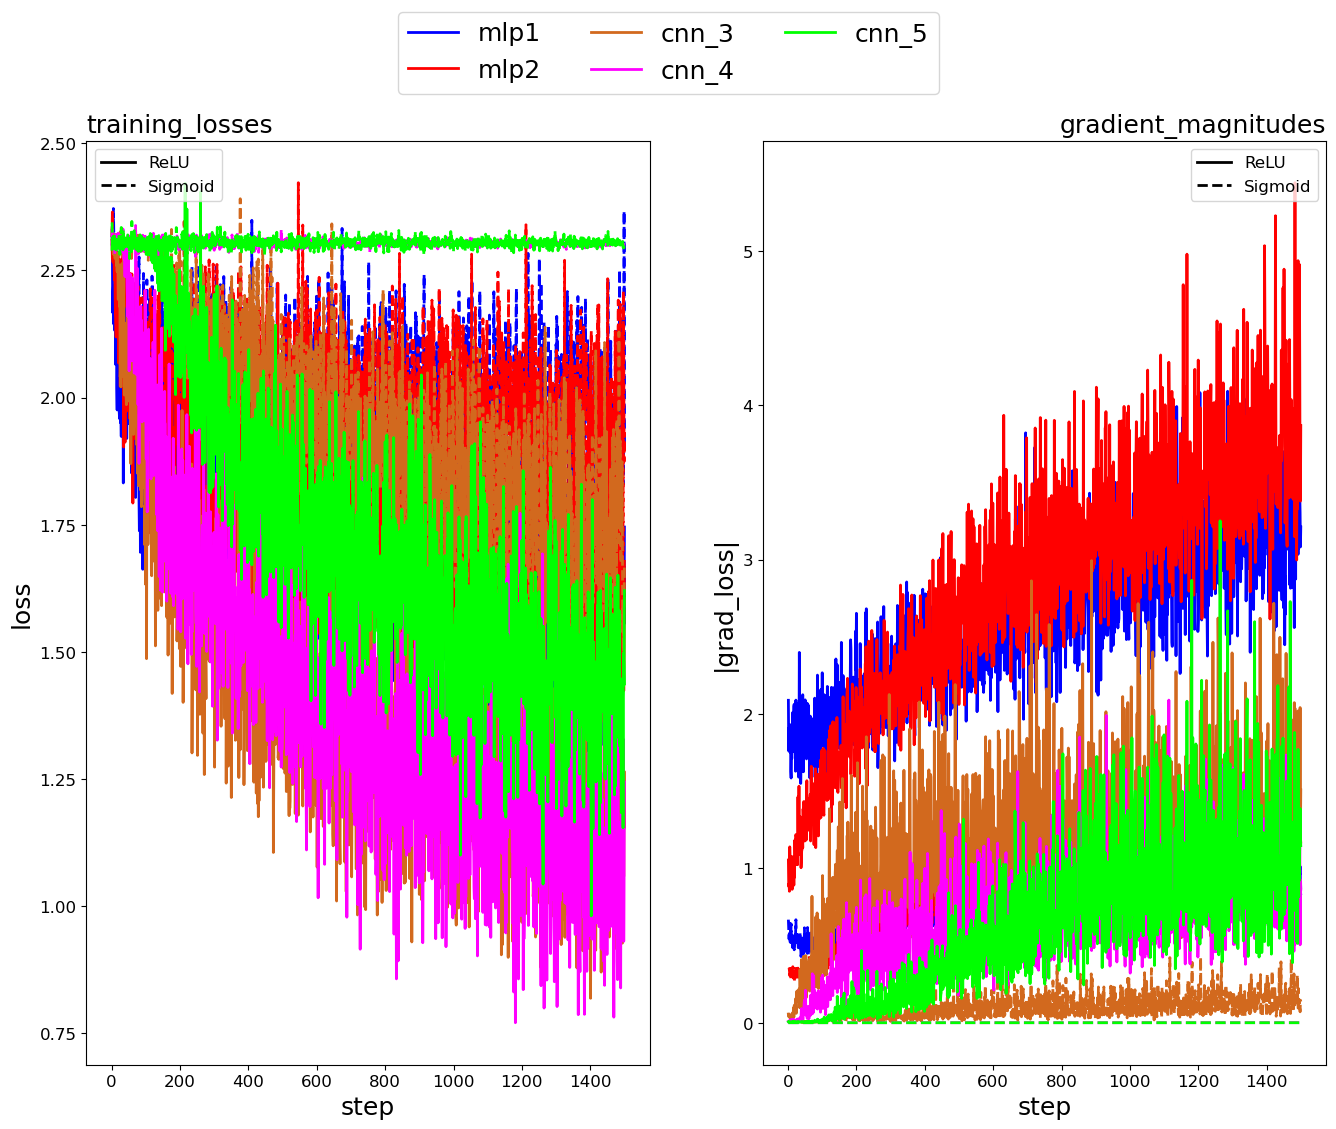

In [8]:
results = [data1, data2, data3, data4, data5]

part4Plots(results, save_dir=r'C:/Users/Yasin', filename='part4Plots')